In [1]:
# This is version 3.20 for smFISH analysis
# This code is created by Elias(Qingxu) Guan from Chrsitian Petersen lab. 
# Before using please make sure: 
# Either install everything following readme 
# Follow the following instructions. 
# For windows and linux user
# 1: make sure you create a unique enviornemnt 
# 2: Make sure you have stardist and bigfish/fishquant installed. 
# For apple and apple silicon user: 
# 1. Make sure you create a unique enviornment. 
# 2. If you dont have brew, make sure follow brew instructions and install brew
# 3. Set up c++ complier 
# if you are using apple silicon
# 1. Install stardist following stardist's instruction. 
# 2. Make sure you have installed tensorflow as instructed on tensorflow website. 
# 3. Make sure you have compatible version. https://pypi.org/project/tensorflow-metal/ Here is where you should go. 

In [2]:
# Setting up Your Conditions
# Setting Path
# If you want to Run your code Please change directories here
controlDirectory = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/control"
experimentDirectory = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment" 
customFileName = "565.tif"
counterstainDirectory = "/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/Experiment" 
counterstainFileName = "633.tif"

In [3]:
# Setting parameters
kernel_size = (1,1.5,1.5)
# Set the voxel size. This is determined by the pixel size of your microscope. Please contact microscopt manufactuer and convert resolution to voxel size. 
# unit is nm, please change to nm and note this should be the same for control and your experimental image. 
# I specifically allow this code to run different voxel size for control and experimental image, but for a good experiment you should not do it like that. 
control_voxel_size = (361,75,75)
voxel_size = (361,75,75)
minimal_distance = (2,2,2)
# Set the spot size as your expected spot size 
spot_size = (600, 300, 300)
saveSpotInformation = True
counterstain = True

In [4]:
# Importing packages 
import glob
import os 
import bigfish.detection 
import bigfish.plot
import tifffile
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Here load functions 
# Function1 : Finding all file path
def find_tif_files(directory, pattern="565.tif"):
    matches = []
    # Walk through the directory and its subdirectories
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(pattern):
                matches.append(os.path.join(root, file))
    return matches
def create_folder_in_same_directory(file_path, folder_name):
    """
    Creates a folder with the specified name in the same directory as the given file.
    If the folder already exists, it returns the existing path.
    """
    # Get the directory of the given file
    directory = os.path.dirname(file_path)
    
    # Define the path for the specified folder
    folder_path = os.path.join(directory, folder_name)
    
    # Check if the folder exists
    if not os.path.exists(folder_path):
        # Create the folder if it doesn't exist
        os.makedirs(folder_path)
        print(f"Created '{folder_name}' folder at: {folder_path}")
    else:
        print(f"'{folder_name}' folder already exists at: {folder_path}")
    
    return folder_path

In [6]:
# If you have control image then read in control images 
if controlDirectory:
    # Create threshold storage 
    controlThresholdCollection = []
    # Finding all tif files in your directory
    controlsmFISHChannelPaths = find_tif_files(controlDirectory,customFileName)
    for i in tqdm(range(len(controlsmFISHChannelPaths))):
        # Get your directory of each single file 
        file_directory = os.path.dirname(controlsmFISHChannelPaths[i])
        # Move to current work directory
        os.chdir(file_directory)
        # Create results folder
        create_folder_in_same_directory(".","results")
        # Aim to save everything in results folder
        os.chdir("results")
        # Read in image
        controlsmFISHChannel = tifffile.imread(controlsmFISHChannelPaths[i])
        # Main Detection function 
        control_spots, control_spots_threshold = bigfish.detection.detect_spots(
                images=controlsmFISHChannel,
                return_threshold=True,
                voxel_size= voxel_size,  # in nanometer (one value per dimension zyx)
                spot_radius= spot_size, # in nanometer (one value per dimension zyx)
                log_kernel_size= kernel_size,
                minimum_distance= minimal_distance)
        # Plot the elbow curve to make sure you have it saved. 
        bigfish.plot.plot_elbow(
                images=controlsmFISHChannel,
                voxel_size=voxel_size,
                spot_radius=spot_size,
                path_output="Elbow.png",
                show=False)
        # Add the threshold to your storage
        controlThresholdCollection.append(control_spots_threshold)
        # Print out the threshold
        print("threshold: {0}".format(control_spots_threshold))

  0%|                                                             | 0/6 [00:00<?, ?it/s]

'results' folder already exists at: results


 17%|████████▊                                            | 1/6 [01:11<05:55, 71.09s/it]

threshold: 12.666666666666666
'results' folder already exists at: results


 33%|█████████████████▋                                   | 2/6 [02:23<04:47, 71.78s/it]

threshold: 3.3333333333333335
'results' folder already exists at: results


 50%|██████████████████████████▌                          | 3/6 [03:56<04:04, 81.38s/it]

threshold: 12.212121212121213
'results' folder already exists at: results


 67%|███████████████████████████████████▎                 | 4/6 [04:45<02:17, 68.80s/it]

threshold: 11.454545454545455
'results' folder already exists at: results


/Users/eliasguan/anaconda3/envs/stardist-env/lib/python3.10/site-packages/bigfish/detection/spot_detection.py:586: RuntimeWarning: divide by zero encountered in log
  count_spots = np.log([np.count_nonzero(value_spots > t)
 83%|████████████████████████████████████████████▏        | 5/6 [05:51<01:07, 67.87s/it]

threshold: 8.666666666666666
'results' folder already exists at: results


100%|█████████████████████████████████████████████████████| 6/6 [06:59<00:00, 69.86s/it]

threshold: 10.02020202020202


In [7]:
# Create your collection for experiment group thresholds
experimentThresholdCollection = []
#  Find all files for your experiment group
experimentsmFISHChannelPaths = find_tif_files(experimentDirectory, customFileName)
for i in tqdm(range(len(experimentsmFISHChannelPaths))):
    # Same as previous code. 
    file_directory = os.path.dirname(experimentsmFISHChannelPaths[i])
    os.chdir(file_directory)
    create_folder_in_same_directory(".","results")
    os.chdir("results")
    experimentsmFISHChannel = tifffile.imread(experimentsmFISHChannelPaths[i])
    # Function to find your spots and threshold 
    experiment_spots, experiment_spots_threshold = bigfish.detection.detect_spots(
            images=experimentsmFISHChannel,
            return_threshold=True,
            voxel_size= voxel_size,  # in nanometer (one value per dimension zyx)
            spot_radius= spot_size, # in nanometer (one value per dimension zyx)
            log_kernel_size= kernel_size,
            minimum_distance= minimal_distance)
    # Plot your elbow curve
    bigfish.plot.plot_elbow(
            images=experimentsmFISHChannel,
            voxel_size=voxel_size,
            spot_radius=spot_size,
            path_output="Elbow.png",
            show=False)
    # Add your threshold to your collection 
    experimentThresholdCollection.append(experiment_spots_threshold)
    # Save the spots here for future works. 
    print("threshold: {0}".format(experiment_spots_threshold))
    if saveSpotInformation == True:
         with open ("spot_info.txt","w") as file :
             file.write("\r shape: {0}".format(experiment_spots.shape))
             file.write("\r dtype: {0}".format(experiment_spots.dtype))
             file.write("\r threshold: {0}".format(experiment_spots_threshold))

  0%|                                                            | 0/16 [00:00<?, ?it/s]

'results' folder already exists at: results


  6%|███▎                                                | 1/16 [01:03<15:55, 63.70s/it]

threshold: 1.9797979797979797
'results' folder already exists at: results


 12%|██████▏                                          | 2/16 [07:46<1:01:24, 263.18s/it]

threshold: 12.01010101010101
'results' folder already exists at: results


 19%|█████████▌                                         | 3/16 [09:27<40:56, 189.00s/it]

threshold: 11.424242424242424
'results' folder already exists at: results


 25%|████████████▊                                      | 4/16 [11:19<31:43, 158.60s/it]

threshold: 12.323232323232322
'results' folder already exists at: results


 31%|███████████████▉                                   | 5/16 [20:20<54:22, 296.60s/it]

threshold: 13.080808080808081
'results' folder already exists at: results


 38%|███████████████████▏                               | 6/16 [22:16<39:10, 235.06s/it]

threshold: 9.0
'results' folder already exists at: results


 44%|██████████████████████▎                            | 7/16 [25:31<33:19, 222.21s/it]

threshold: 10.181818181818182
'results' folder already exists at: results


 50%|█████████████████████████▌                         | 8/16 [38:09<52:22, 392.81s/it]

threshold: 9.818181818181817
'results' folder already exists at: results


 56%|███████████████████████████▌                     | 9/16 [51:43<1:01:09, 524.27s/it]

threshold: 2.404040404040404
'results' folder already exists at: results


 62%|███████████████████████████████▎                  | 10/16 [59:50<51:17, 512.83s/it]

threshold: 11.11111111111111
'results' folder already exists at: results


 69%|█████████████████████████████████               | 11/16 [1:17:41<56:57, 683.57s/it]

threshold: 13.787878787878789
'results' folder already exists at: results


 75%|████████████████████████████████████            | 12/16 [1:26:41<42:39, 639.98s/it]

threshold: 11.313131313131313
'results' folder already exists at: results


 81%|███████████████████████████████████████         | 13/16 [1:35:16<30:06, 602.03s/it]

threshold: 9.95959595959596
'results' folder already exists at: results


 88%|██████████████████████████████████████████      | 14/16 [1:53:23<24:57, 748.52s/it]

threshold: 12.767676767676768
'results' folder already exists at: results


 94%|█████████████████████████████████████████████   | 15/16 [2:03:54<11:53, 713.18s/it]

threshold: 14.727272727272728
'results' folder already exists at: results


100%|████████████████████████████████████████████████| 16/16 [2:14:26<00:00, 504.15s/it]

threshold: 10.757575757575758


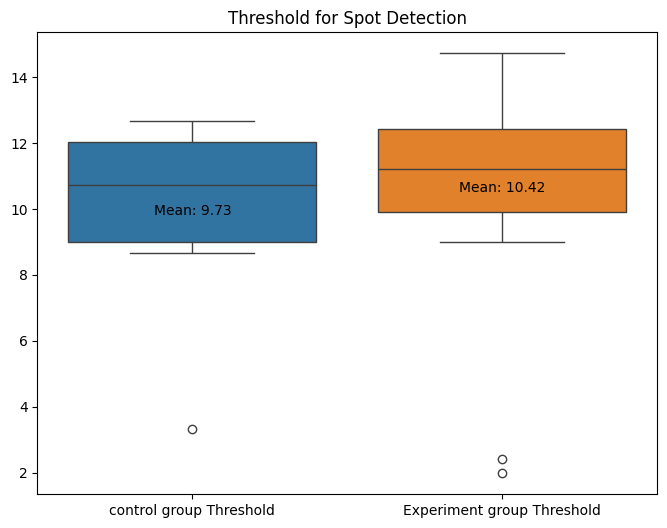

In [8]:
thresholds = [controlThresholdCollection, experimentThresholdCollection]
labels = ['control group Threshold', "Experiment group Threshold"]
plt.figure(figsize=(8, 6))
sns.boxplot(data=thresholds)

# Add title
plt.title("Threshold for Spot Detection")

# Calculate and annotate mean values
for i, dataset in enumerate(thresholds):
    mean_value = np.mean(dataset)
    plt.text(i, mean_value, f'Mean: {mean_value:.2f}', 
             ha='center', va='bottom', color='black')

# Set x-ticks
plt.xticks(ticks=[0, 1], labels=labels)

# Display the plot
plt.show()

In [9]:
# Create your collection for counterstain group thresholds
if counterstain:
    counterstainThresholdCollection = []
    #  Find all files for your counterstain group
    counterstainsmFISHChannelPaths = find_tif_files(counterstainDirectory, counterstainFileName)
    for i in tqdm(range(len(counterstainsmFISHChannelPaths))):
        # Same as previous code. 
        file_directory = os.path.dirname(counterstainsmFISHChannelPaths[i])
        os.chdir(file_directory)
        create_folder_in_same_directory(".","results")
        os.chdir("results")
        counterstainsmFISHChannel = tifffile.imread(counterstainsmFISHChannelPaths[i])
        # Function to find your spots and threshold 
        counterstain_spots, counterstain_spots_threshold = bigfish.detection.detect_spots(
                images=counterstainsmFISHChannel,
                return_threshold=True,
                voxel_size= voxel_size,  # in nanometer (one value per dimension zyx)
                spot_radius= spot_size, # in nanometer (one value per dimension zyx)
                log_kernel_size= kernel_size,
                minimum_distance= minimal_distance)
        # Plot your elbow curve
        bigfish.plot.plot_elbow(
                images=counterstainsmFISHChannel,
                voxel_size=voxel_size,
                spot_radius=spot_size,
                path_output="Elbow.png",
                show=False)
        # Add your threshold to your collection 
        counterstainThresholdCollection.append(counterstain_spots_threshold)
        # Save the spots here for future works. 
        print("threshold: {0}".format(counterstain_spots_threshold))

  0%|                                                            | 0/16 [00:00<?, ?it/s]

'results' folder already exists at: results


  6%|███▎                                                | 1/16 [00:37<09:26, 37.79s/it]

threshold: 19.636363636363637
'results' folder already exists at: results


 12%|██████▍                                            | 2/16 [07:11<57:41, 247.26s/it]

threshold: 6.222222222222222
'results' folder already exists at: results


 19%|█████████▌                                         | 3/16 [08:53<39:08, 180.64s/it]

threshold: 17.67676767676768
'results' folder already exists at: results


 25%|████████████▊                                      | 4/16 [10:43<30:33, 152.80s/it]

threshold: 8.98989898989899
'results' folder already exists at: results


 31%|███████████████▉                                   | 5/16 [19:40<53:24, 291.32s/it]

threshold: 5.8686868686868685
'results' folder already exists at: results


 38%|███████████████████▏                               | 6/16 [21:36<38:38, 231.87s/it]

threshold: 4.848484848484849
'results' folder already exists at: results


 44%|██████████████████████▎                            | 7/16 [24:40<32:25, 216.15s/it]

threshold: 4.787878787878788
'results' folder already exists at: results


 50%|█████████████████████████▌                         | 8/16 [36:50<50:39, 379.94s/it]

threshold: 13.85858585858586
'results' folder already exists at: results


 56%|████████████████████████████▋                      | 9/16 [44:34<47:23, 406.19s/it]

threshold: 11.555555555555555
'results' folder already exists at: results


 62%|███████████████████████████████▎                  | 10/16 [52:40<43:05, 430.85s/it]

threshold: 7.090909090909091
'results' folder already exists at: results


 69%|█████████████████████████████████               | 11/16 [1:10:22<51:59, 623.97s/it]

threshold: 6.151515151515151
'results' folder already exists at: results


 75%|████████████████████████████████████            | 12/16 [1:19:40<40:14, 603.74s/it]

threshold: 5.03030303030303
'results' folder already exists at: results


 81%|███████████████████████████████████████         | 13/16 [1:29:51<30:17, 605.89s/it]

threshold: 5.797979797979798
'results' folder already exists at: results


 88%|██████████████████████████████████████████      | 14/16 [1:51:16<27:02, 811.14s/it]

threshold: 8.787878787878787
'results' folder already exists at: results


 94%|█████████████████████████████████████████████   | 15/16 [2:04:53<13:32, 812.76s/it]

threshold: 6.363636363636363
'results' folder already exists at: results


100%|████████████████████████████████████████████████| 16/16 [2:15:15<00:00, 507.21s/it]

threshold: 19.28282828282828


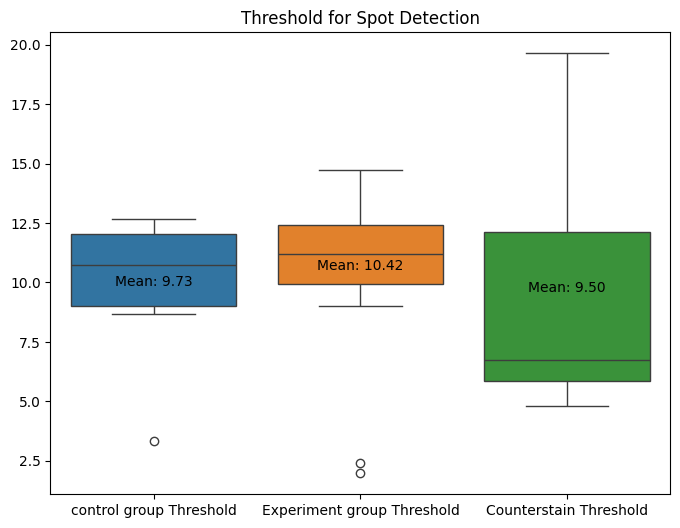

In [10]:
thresholds = [controlThresholdCollection, experimentThresholdCollection, counterstainThresholdCollection]
labels = ['control group Threshold', "Experiment group Threshold", "Counterstain Threshold"]
plt.figure(figsize=(8, 6))
sns.boxplot(data=thresholds)

# Add title
plt.title("Threshold for Spot Detection")

# Calculate and annotate mean values
for i, dataset in enumerate(thresholds):
    mean_value = np.mean(dataset)
    plt.text(i, mean_value, f'Mean: {mean_value:.2f}', 
             ha='center', va='bottom', color='black')

# Set x-ticks
plt.xticks(ticks=[0, 1, 2], labels=labels)

# Display the plot
plt.show()

In [11]:
# Create your collection for counterstain group thresholds
if counterstain:
    counterstainControlThresholdCollection = []
    #  Find all files for your counterstain group
    counterstainControlsmFISHChannelPaths = find_tif_files(controlDirectory, counterstainFileName)
    for i in tqdm(range(len(counterstainControlsmFISHChannelPaths))):
        # Same as previous code. 
        file_directory = os.path.dirname(counterstainControlsmFISHChannelPaths[i])
        os.chdir(file_directory)
        create_folder_in_same_directory(".","results")
        os.chdir("results")
        counterstainControlsmFISHChannel = tifffile.imread(counterstainControlsmFISHChannelPaths[i])
        # Function to find your spots and threshold 
        counterstainControl_spots, counterstainControl_spots_threshold = bigfish.detection.detect_spots(
                images=counterstainControlsmFISHChannel,
                return_threshold=True,
                voxel_size= voxel_size,  # in nanometer (one value per dimension zyx)
                spot_radius= spot_size, # in nanometer (one value per dimension zyx)
                log_kernel_size= kernel_size,
                minimum_distance= minimal_distance)
        # Plot your elbow curve
        bigfish.plot.plot_elbow(
                images=counterstainControlsmFISHChannel,
                voxel_size=voxel_size,
                spot_radius=spot_size,
                path_output="Elbow.png",
                show=False)
        # Add your threshold to your collection 
        counterstainControlThresholdCollection.append(counterstainControl_spots_threshold)
        # Save the spots here for future works. 
        print("threshold: {0}".format(counterstainControl_spots_threshold))

  0%|                                                             | 0/6 [00:00<?, ?it/s]

'results' folder already exists at: results


 17%|████████▊                                            | 1/6 [01:10<05:53, 70.74s/it]

threshold: 8.98989898989899
'results' folder already exists at: results


 33%|█████████████████▋                                   | 2/6 [02:08<04:12, 63.25s/it]

threshold: 19.151515151515152
'results' folder already exists at: results


 50%|██████████████████████████▌                          | 3/6 [03:39<03:47, 75.83s/it]

threshold: 5.797979797979798
'results' folder already exists at: results


 67%|███████████████████████████████████▎                 | 4/6 [04:28<02:10, 65.41s/it]

threshold: 5.545454545454545
'results' folder already exists at: results


 83%|████████████████████████████████████████████▏        | 5/6 [05:34<01:05, 65.52s/it]

threshold: 4.96969696969697
'results' folder already exists at: results


100%|█████████████████████████████████████████████████████| 6/6 [06:41<00:00, 66.92s/it]

threshold: 5.2727272727272725


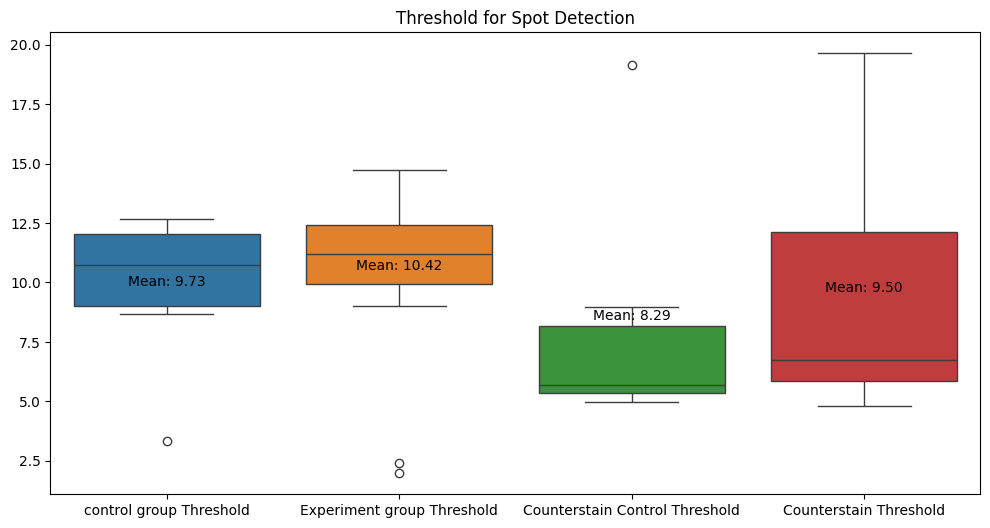

In [16]:
thresholds = [controlThresholdCollection, experimentThresholdCollection, counterstainControlThresholdCollection, counterstainThresholdCollection]
labels = ['control group Threshold', "Experiment group Threshold", "Counterstain Control Threshold", "Counterstain Threshold"]
plt.figure(figsize=(12, 6))
sns.boxplot(data=thresholds)

# Add title
plt.title("Threshold for Spot Detection")

# Calculate and annotate mean values
for i, dataset in enumerate(thresholds):
    mean_value = np.mean(dataset)
    plt.text(i, mean_value, f'Mean: {mean_value:.2f}', 
             ha='center', va='bottom', color='black')

# Set x-ticks
plt.xticks(ticks=[0, 1, 2, 3], labels=labels)
plt.savefig("thresholds.png")
# Display the plot
plt.show()

In [14]:
os.getcwd()

'/Users/eliasguan/Desktop/EG_0920_Test_wnt1_incision_amputation/Experiment_dataset/control/0h_incision_Image1/633/results'

In [15]:
plt.savefig("thresholds.png")

<Figure size 640x480 with 0 Axes>